In [2]:
from sklearn import metrics
import numpy as np
from classes.boosting_matrix import BoostingMatrix
from classes.dataset import Dataset
from settings import Settings
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import Counter
from classes.pattern_boosting import PatternBoosting
from settings import Settings
from classes.enumeration.estimation_type import EstimationType
from data.synthetic_dataset import SyntheticDataset
from data import data_reader
import pandas as pd
import copy
import matplotlib.pyplot as plt
from classes.analysis import Analysis



Start by loading the model "pattern_boosting" and getting the frequency matrix

In [ ]:
directory = data_reader.get_save_location(folder_relative_path="results/jupiter", create_unique_subfolder=True)
pattern_boosting = data_reader.load_data(directory=directory, filename="pattern_boosting")
frequency_matrix = pd.DataFrame(pattern_boosting.boosting_matrix.get_matrix(),
                                columns=pattern_boosting.boosting_matrix.get_header())

Frequency matrix:

In [ ]:
tmp = frequency_matrix.sort_values(by=list(frequency_matrix.columns), ascending=False)
tmp.iloc[: 5, : 9]

Most common paths (counted by the total number of time they are present):

In [ ]:
paths_total_presence = frequency_matrix.sum()
print(paths_total_presence.sort_values(ascending=False)[:5])

Number of graph a path is present in

In [ ]:
presence_per_observation = frequency_matrix.astype(bool).sum(axis=0)
presence_per_observation

Find paths up to length 'max_length' whose precessors are present in proportion p1,p2,p3, with boundaries "acceptable_error", note the ratio is made on the number of graphs a path is present, NOT the total number of times

In [ ]:
max_length = 4
proportions = [1, 0.5, 0.25, 0.125]
acceptable_error = 0.1



In [ ]:
def is_sub_tuple(s, l):
    sub_set = False
    if s == []:
        sub_set = True
    elif s == l:
        sub_set = True
    elif len(s) > len(l):
        sub_set = False

    else:
        for i in range(len(l)):
            if l[i] == s[0]:
                n = 1
                while (n < len(s)) and (l[i + n] == s[n]):
                    n += 1

                if n == len(s):
                    sub_set = True

    return sub_set


def get_ratio_with_next_paths(parent_index, parent_value, presence_per_observation, ratio, acccepred_error):
    founded_paths = []
    ratios = []
    for index, value in presence_per_observation.items():
        if parent_index == index:
            continue
        elif is_sub_tuple(parent_index, index):
            ratio_here = value / parent_value
            if ratio_here - acccepred_error < ratio < ratio_here + acccepred_error:
                ratios.append(ratio_here)
                founded_paths.append(index)
    return ratios, founded_paths


finally_selected_paths = []

for index, value in presence_per_observation.items():
    ratios, founded_paths = get_ratio_with_next_paths(parent_index=index, parent_value=value,
                                                      presence_per_observation=presence_per_observation,
                                                      ratio=proportions[1], acccepred_error=acceptable_error)

    for i, path in enumerate(founded_paths):
        selected_ratios, selected_paths = get_ratio_with_next_paths(parent_index=path,
                                                                    parent_value=presence_per_observation[path],
                                                                    presence_per_observation=presence_per_observation,
                                                                    ratio=proportions[2],
                                                                    acccepred_error=acceptable_error)
        finally_selected_paths = copy.copy(finally_selected_paths + selected_paths)

finally_selected_paths

directory = data_reader.get_save_location(folder_relative_path="results/jupiter", create_unique_subfolder=True)
pattern_boosting = data_reader.save_dataset_in_binary_file(dataset=finally_selected_paths, directory=directory,
                                                           filename="finally_selected_paths", )

Paths that respect the first two ratios:

In [ ]:
directory = data_reader.get_save_location(folder_relative_path="results/jupiter", create_unique_subfolder=True)
pattern_boosting = data_reader.load_data(directory=directory, filename="finally_selected_paths")
selected_paths = [item for item in finally_selected_paths if len(item) == 3]

Now we generate the target paths, including the paths of length one and two

In [ ]:
target_paths = []
for path in selected_paths:
    for i in range(len(path)):
        target_paths.append(path[:i])

Correlation matrices of subpaths

In [ ]:
def ceildiv(a, b):
    return -(a // -b)


# number of plots per row
nppr = 3

number_of_plots=10

nr_rows = ceildiv(len(selected_paths[:number_of_plots]), nppr)
fig, axs = plt.subplots(nr_rows, nppr)
fig.tight_layout()

for j, path in enumerate(selected_paths[:number_of_plots]):
    subpaths = []
    for i in range(1, len(path) + 1):
        subpaths.append(path[:i])
        column_number = j % nppr
        row_number = j // nppr
        axs[row_number, column_number].matshow(frequency_matrix[subpaths].corr())
        axs[row_number, column_number].set_title(str(path))

In [ ]:
nr_rows = ceildiv(len(selected_paths[number_of_plots:]), nppr)
fig, axs = plt.subplots(nr_rows, nppr)
fig.tight_layout()


for j, path in enumerate(selected_paths[number_of_plots:]):
    subpaths = []
    for i in range(1, len(path) + 1):
        subpaths.append(path[:i])
        column_number = j % nppr
        row_number = j // nppr
        axs[row_number, column_number].matshow(frequency_matrix[subpaths].corr())
        axs[row_number, column_number].set_title(str(path))

Correlation matrix over all the paths

In [ ]:
target_paths = list({(57, 7, 7), (57, 7), (57,),
                     (72, 7, 14), (72, 7), (72,),
                     (78, 6, 7), (78, 6), (78,),
                     (47, 7, 7), (47, 7), (47,),
                     (74, 15, 8), (74, 15), (74,),
                     (80, 7, 7), (80, 7), (80,),
                     (77, 7, 7), (77, 7), (77,),
                     (40, 7, 14), (40, 7), (40,),
                     (21, 7, 14), (21, 7), (21,),
                     (27, 6, 5), (27, 6), (27,),
                     (27, 6, 8),
                     (42, 7, 7), (42, 7), (42,),
                     (39, 7, 7), (39, 7), (39,),
                     (39, 7, 14),
                     (39, 6, 7), (39, 6),
                     (39, 6, 14),
                     (39, 6, 5),
                     (45, 7, 7), (45, 7), (45,),
                     (48, 8, 7), (48, 8), (48,)})
plt.matshow(frequency_matrix[target_paths].corr())


In [ ]:
analysis = Analysis()
directory=data_reader.get_save_location(folder_relative_path="results")
directory='/Users/popcorn/PycharmProjects/pattern_boosting/results/Xgb_step_1001_max_path_length_100_5_k_selection_graphs'

analysis.load_and_analyze(directory=directory,
                              show=True,
                              save=False)

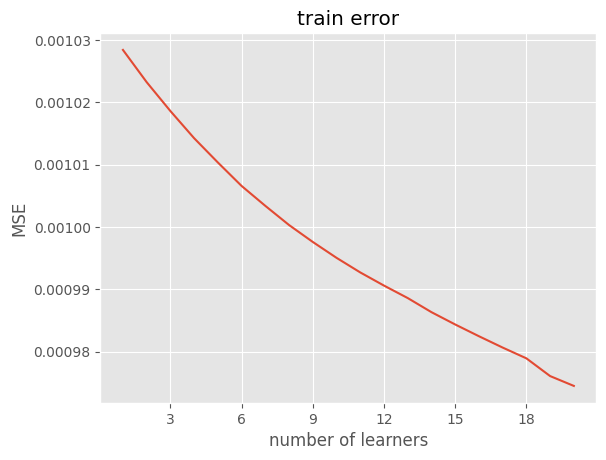

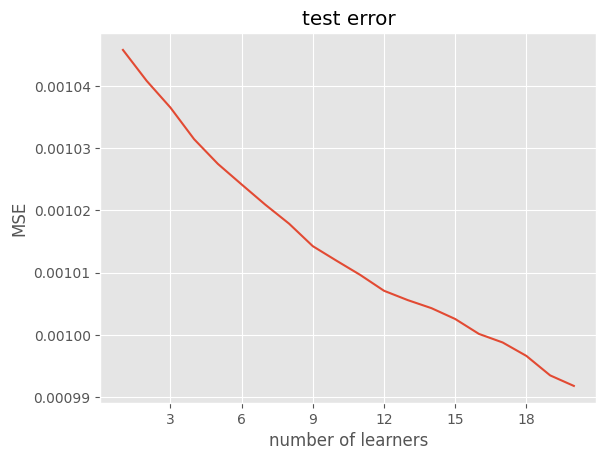

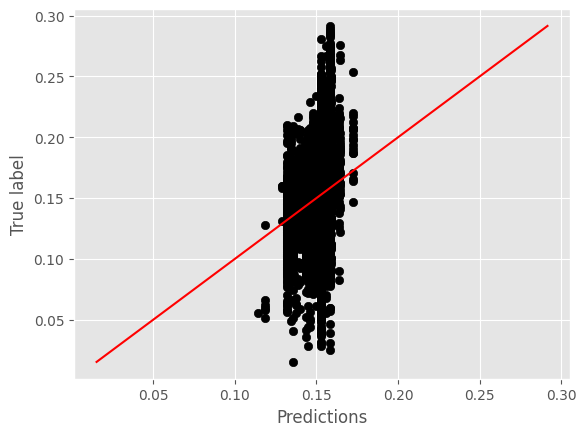

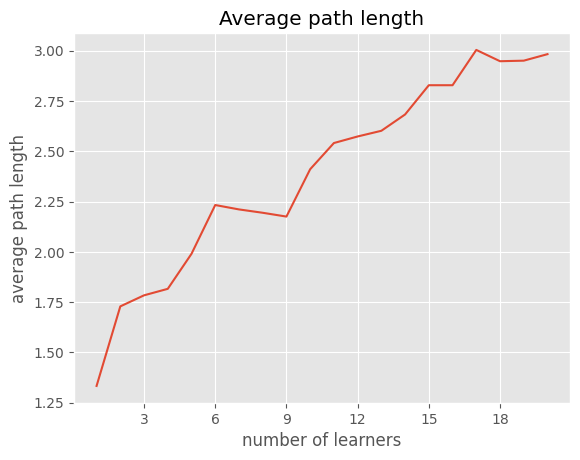

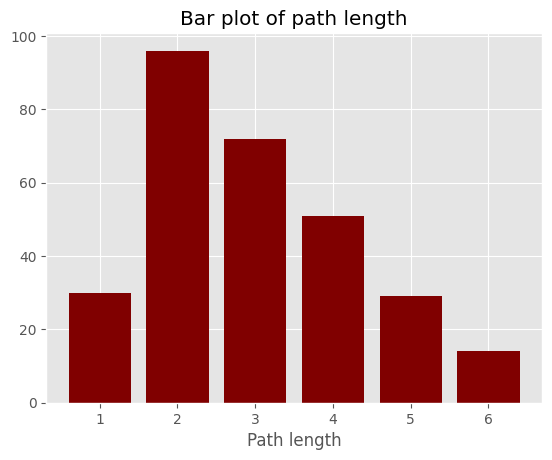

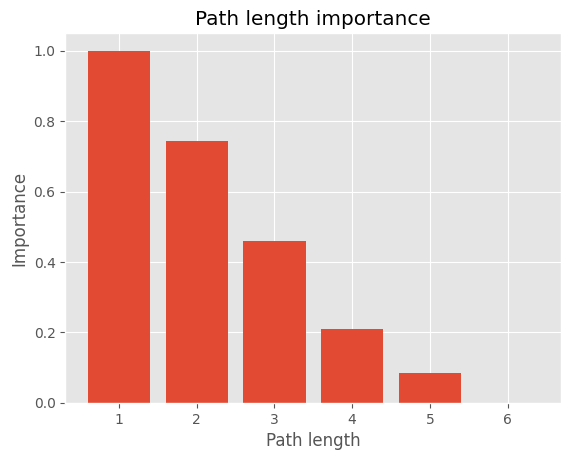

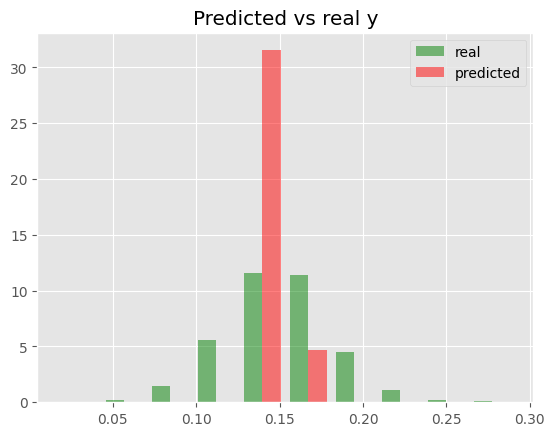


--------------------------------------------------------------------------------
Training dataset dimension: 48639
Test dataset dimension: 12160
Number of iterations: 20
Number of iterations: 20
Boosting Matrix:
Boosting matrix header:
[(57,), (75,), (72,), (78,), (23,), (26,), (29,), (44,), (41,), (47,), (74,), (80,), (25,), (77,), (22,), (28,), (40,), (43,), (46,), (73,), (76,), (21,), (79,), (24,), (30,), (27,), (42,), (39,), (45,), (48,), (28, 33), (28, 17), (28, 1), (28, 7), (28, 16), (28, 35), (28, 9), (28, 53), (28, 6), (28, 28), (28, 15), (28, 5), (28, 34), (28, 8), (28, 14), (28, 7, 16), (28, 7, 6), (28, 7, 35), (28, 7, 9), (28, 7, 15), (28, 7, 28), (28, 7, 34), (28, 7, 8), (28, 7, 53), (28, 7, 5), (28, 7, 1), (28, 7, 14), (28, 7, 17), (28, 7, 7), (75, 16), (75, 6), (75, 35), (75, 53), (75, 9), (75, 15), (75, 5), (75, 8), (75, 34), (75, 75), (75, 14), (75, 33), (75, 17), (75, 1), (75, 7), (30, 8), (30, 30), (30, 53), (30, 14), (30, 33), (30, 1), (30, 7), (30, 16), (30, 6), (3

In [3]:

analysis = Analysis()
directory=data_reader.get_save_location(folder_relative_path="results")
directory='/Users/popcorn/PycharmProjects/pattern_boosting/results/Xgb_step_20_max_path_length_100_60k_dataset'

analysis.load_and_analyze(directory=directory,

                              show=True,
                              save=True)